In [ ]:
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from spikeinterface.core import WaveformExtractor

In [ ]:
sorting_raw = si.load_extractor('raw/new_sorting/')
sorting_di = se.read_kilosort('di/kilosort3/')

In [ ]:
comp = sc.compare_two_sorters(sorting1=sorting_raw,
                              sorting2=sorting_di,
                              sorting1_name='Raw',
                              sorting2_name='DI')

### Comparison between the two sortings

Plot agreement matrix between the two sortings

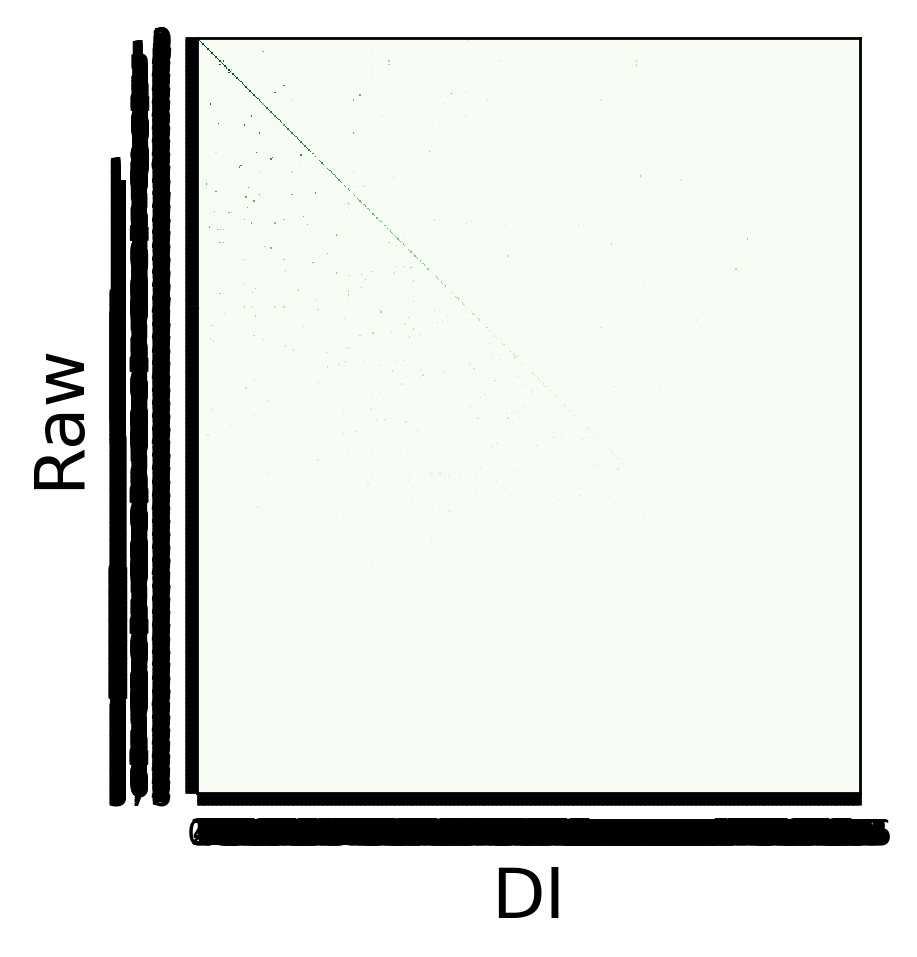

In [ ]:
mpl.rcParams['figure.dpi'] = 250
sw.plot_agreement_matrix(comp, ordered=True, count_text=False, unit_ticks=False)

Try quality metrics

Get values for the matrix

In [ ]:
comp.get_ordered_agreement_scores()

,362,94,58,53,308,335,122,358,322,300,...,417,419,421,482,429,458,466,506,488,505
565,0.996999,0.001872,0.002171,0.001679,0.002892,0.002832,0.003139,0.004175,0.000938,0.012264,...,0.000413,0.000413,0.000204,0.000200,0.000206,0.0,0.000203,0.000000,0.00000,0.0
136,0.001874,0.988489,0.000000,0.001431,0.001689,0.001609,0.001685,0.002588,0.000734,0.001002,...,0.000000,0.000000,0.000000,0.000977,0.001131,0.0,0.000000,0.000962,0.00000,0.0
84,0.002170,0.000000,0.982301,0.000486,0.001382,0.001328,0.000410,0.001934,0.000991,0.002911,...,0.000000,0.000000,0.000625,0.001190,0.000000,0.0,0.000000,0.000000,0.00000,0.0
86,0.001863,0.001415,0.000485,0.982019,0.001671,0.001592,0.002761,0.001422,0.000000,0.000999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000933,0.00000,0.0
424,0.003178,0.001681,0.001657,0.001671,0.980469,0.003409,0.000888,0.002959,0.001014,0.003127,...,0.000404,0.000000,0.000000,0.000381,0.000000,0.0,0.000000,0.000379,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.001039,0.000000,0.000000,0.000000,0.000000,0.000775,0.000000,0.001355,0.000000,0.000355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00365,0.0
559,0.003101,0.001127,0.000651,0.000000,0.000405,0.000765,0.000000,0.001673,0.002307,0.000353,...,0.000000,0.000000,0.000000,0.000000,0.002564,0.0,0.000000,0.000000,0.00000,0.0
372,0.000832,0.000000,0.000000,0.000000,0.000000,0.000388,0.000000,0.000339,0.000000,0.000473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0
554,0.002089,0.001202,0.000000,0.000000,0.000414,0.000000,0.000000,0.000000,0.000000,0.000356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0


Histogram of the diagonal of the agreement matrix

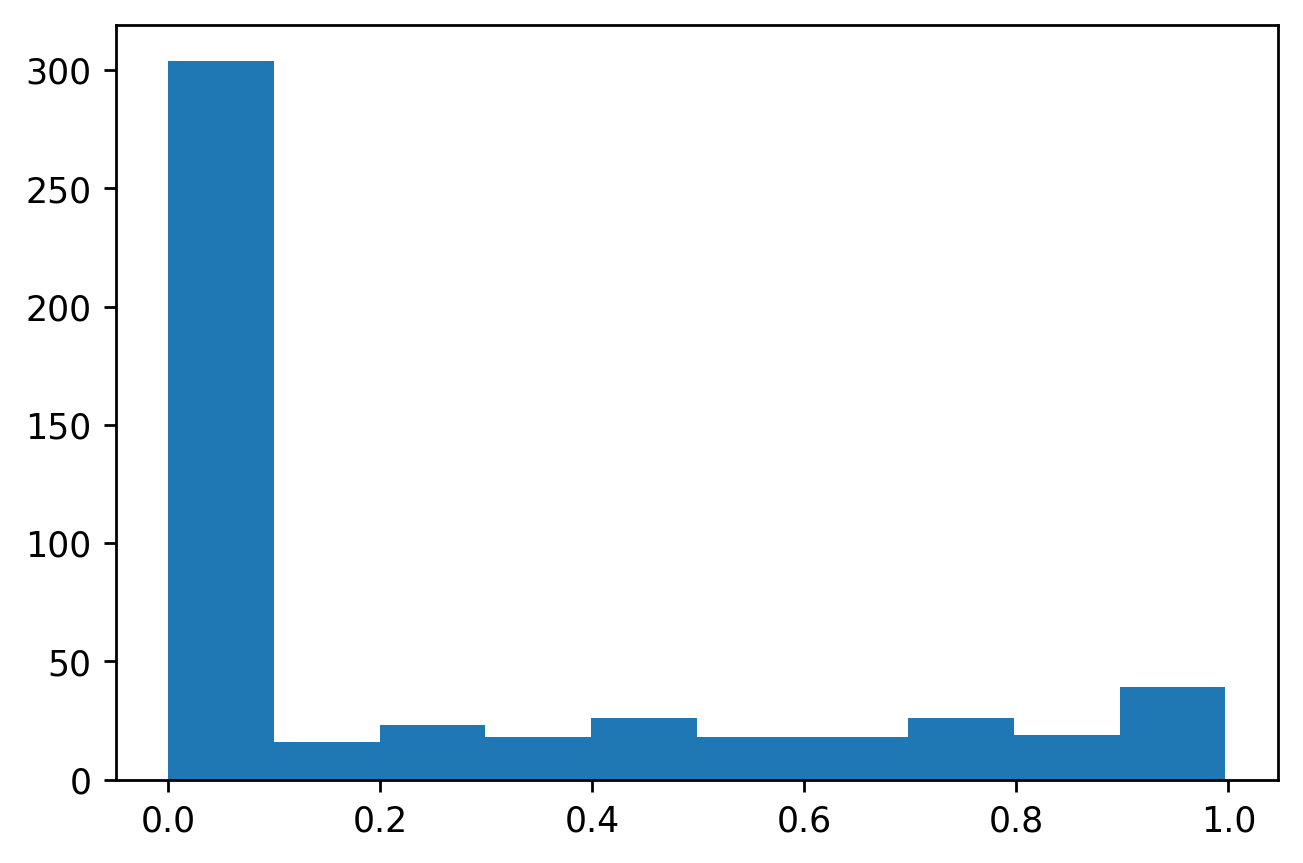

In [ ]:
plt.hist(np.diag(comp.get_ordered_agreement_scores().to_numpy()));

### Comparison with ground truth

Load ground truth as a sorting

In [ ]:
spike_times_path = 'c14_patch_ch1_spike_times_full_npx_ind.npy'
spike_times = np.load(spike_times_path)
sorting_true = si.NumpySorting.from_times_labels(spike_times,
                                                 np.ones(len(spike_times)),
                                                 sampling_frequency=30e3)

Ground truth vs. DI

In [ ]:
comp_true_vs_di = sc.compare_two_sorters(sorting1=sorting_true,
                                         sorting2=sorting_di,
                                         sorting1_name='True',
                                         sorting2_name='Kilosort after DI')

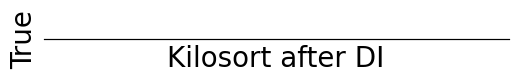

In [ ]:
mpl.rcParams['figure.dpi'] = 100
_, ax = plt.subplots()
sw.plot_agreement_matrix(comp_true_vs_di,
                         ordered=True,
                         count_text=False,
                         unit_ticks=False,
                         ax=ax)
# ax.set_xticks([]);
# ax.set_yticks([]);

In [ ]:
comp_true_vs_di.get_ordered_agreement_scores()

,349,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
1.0,0.272703,0.000707,0.001092,0.000183,0.002281,0.002062,0.000553,0.005127,0.001497,0.000183,...,0.001473,0.000789,0.001356,0.001241,0.00065,0.000343,0.0,0.0,0.0,0.000176


Ground truth vs. raw

In [ ]:
comp_true_vs_raw = sc.compare_two_sorters(sorting1=sorting_true,
                                          sorting2=sorting_raw,
                                          sorting1_name='True',
                                          sorting2_name='Kilosort on Raw')

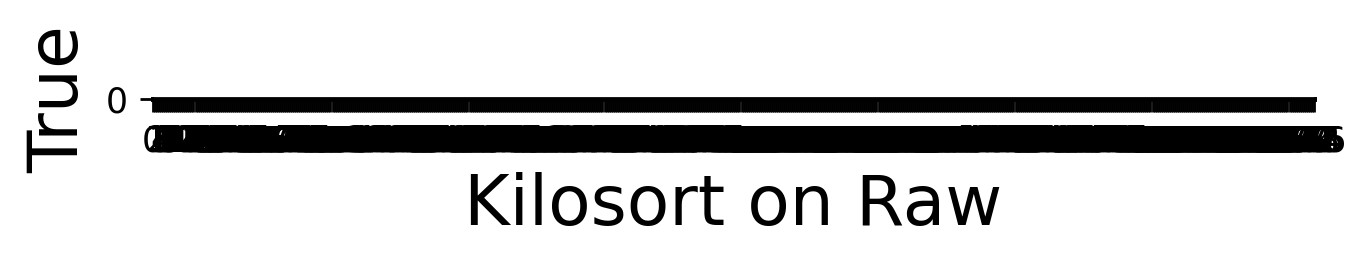

In [ ]:
mpl.rcParams['figure.dpi'] = 250
sw.plot_agreement_matrix(comp_true_vs_raw, ordered=True, count_text=False, unit_ticks=False)

In [ ]:
comp_true_vs_raw.get_ordered_agreement_scores()

,526,0,1,2,3,4,5,6,7,8,...,635,636,637,639,640,641,642,644,645,646
1.0,0.20058,0.000367,0.000362,0.002309,0.001101,0.000183,0.000365,0.000553,0.000181,0.000542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check raster for the best matching cells from all three sortings

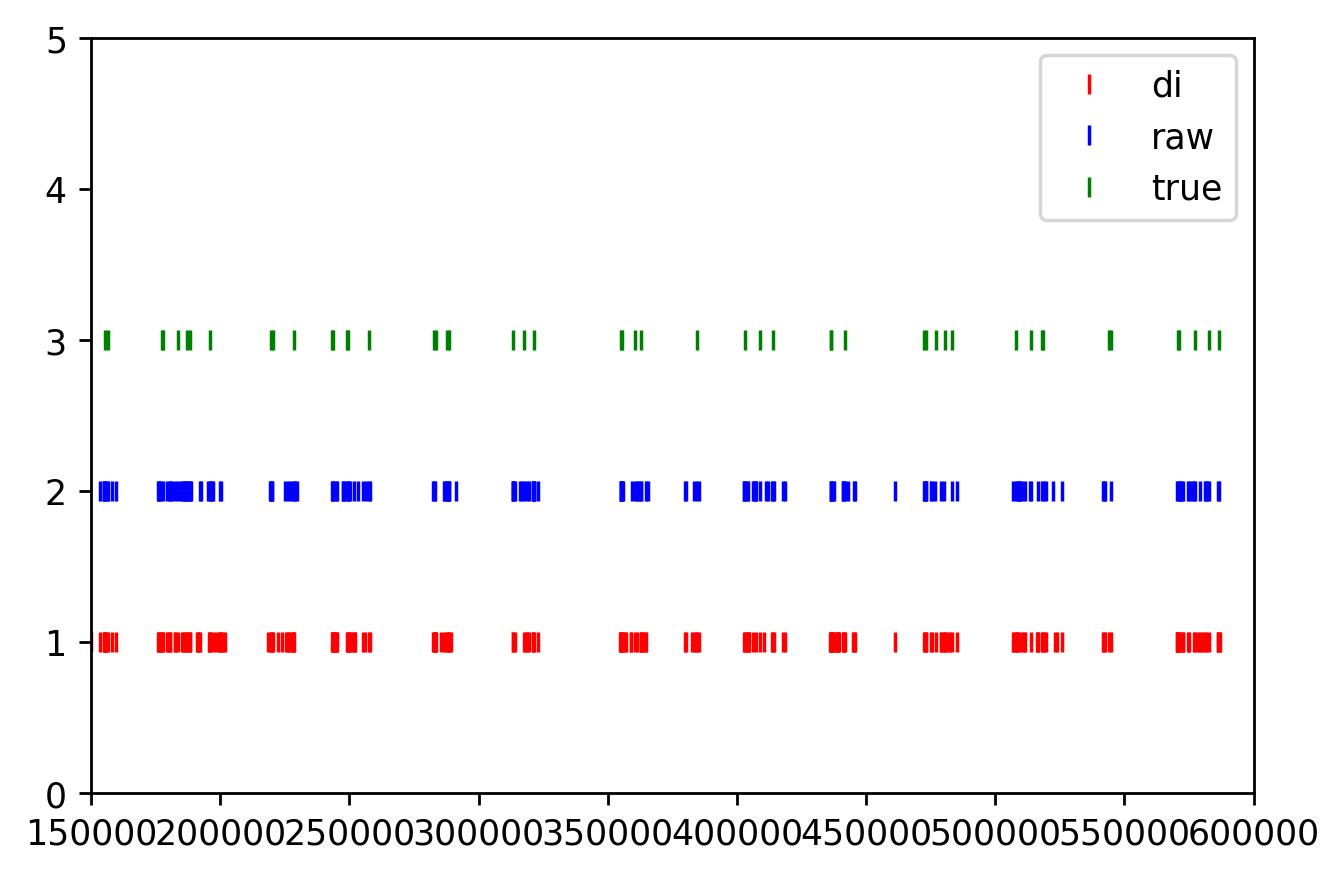

In [ ]:
spikes_di = sorting_di.get_unit_spike_train(unit_id=349)
spikes_raw = sorting_raw.get_unit_spike_train(unit_id=526)
spikes_true = sorting_true.get_unit_spike_train(unit_id=1)

plt.plot(spikes_di, np.ones(len(spikes_di)), 'r|', label='di')
plt.plot(spikes_raw, 2*np.ones(len(spikes_raw)), 'b|', label='raw')
plt.plot(spikes_true, 3*np.ones(len(spikes_true)), 'g|', label='true')
plt.xlim([5*30000,20*30000])
plt.ylim([0,5])
plt.legend()

My guess is that in both the raw and di kilosorts, the true cell got merged with another cell

#### Hits and false positives

In [ ]:
sorting_raw = si.load_extractor('raw/new_sorting/')
sorting_di = se.read_kilosort('di/kilosort3/')

spike_times_path = 'c14_patch_ch1_spike_times_full_npx_ind.npy'
spike_times = np.load(spike_times_path)
sorting_true = si.NumpySorting.from_times_labels(spike_times,
                                                 np.ones(len(spike_times)),
                                                 sampling_frequency=30e3)

comp_true_vs_di = sc.compare_two_sorters(sorting1=sorting_true,
                                         sorting2=sorting_di,
                                         sorting1_name='True',
                                         sorting2_name='Kilosort after DI')

comp_true_vs_raw = sc.compare_two_sorters(sorting1=sorting_true,
                                          sorting2=sorting_raw,
                                          sorting1_name='True',
                                          sorting2_name='Kilosort on Raw')

In [ ]:
best_cell_id_di = 349
best_cell_id_raw = 526

spikes_di = sorting_di.get_unit_spike_train(unit_id=best_cell_id_di)
spikes_raw = sorting_raw.get_unit_spike_train(unit_id=best_cell_id_raw)
spikes_true = sorting_true.get_unit_spike_train(unit_id=1)

DI

In [ ]:
# total number of spikes, ground truth cell
comp_true_vs_di.event_counts1

1.0    5325
dtype: int64

In [ ]:
# hits
np.array(comp_true_vs_di.match_event_count)[0,sorting_di.get_unit_ids()==best_cell_id_di]

array([5105])

In [ ]:
# total number of spikes, best match from di sort
comp_true_vs_di.event_counts2[sorting_di.get_unit_ids()==best_cell_id_di]

349    18500
dtype: int64

Raw

In [ ]:
# total spikes, true cell
comp_true_vs_raw.event_counts1

1.0    5325
dtype: int64

In [ ]:
# hits
np.array(comp_true_vs_raw.match_event_count)[0,sorting_raw.get_unit_ids()==best_cell_id_raw]

array([3248])

In [ ]:
# total number of spikes, best match from raw sort
comp_true_vs_raw.event_counts2[sorting_raw.get_unit_ids()==best_cell_id_raw]

526    14116
dtype: int64

Find index for hits and false positive spikes for DI and raw

In [ ]:
from spikeinterface.comparison.comparisontools import compare_spike_trains, count_matching_events

In [ ]:
# get spike times
spikes_di = sorting_di.get_unit_spike_train(unit_id=349)
spikes_raw = sorting_raw.get_unit_spike_train(unit_id=526)
spikes_true = sorting_true.get_unit_spike_train(unit_id=1)

In [ ]:
# get labels on spikes (fp or hits)
_, spikes_di_label = compare_spike_trains(spikes_true, spikes_di, delta_frames=12)
_, spikes_raw_label = compare_spike_trains(spikes_true, spikes_raw, delta_frames=12)

In [ ]:
# find index for waveforms that are fp vs. hits
false_positive_index_di = np.nonzero(spikes_di_label=='FP')[0]
false_positive_index_raw = np.nonzero(spikes_raw_label=='FP')[0]

hits_index_di = np.nonzero(spikes_di_label=='TP')[0]
hits_index_raw = np.nonzero(spikes_raw_label=='TP')[0]

Plot waveforms for hits vs. false positives for DI and raw

In [ ]:
# load waveform extractors
we_di = WaveformExtractor.load_from_folder(folder='di/wf/')
we_raw = WaveformExtractor.load_from_folder(folder='raw/wf/')

In [ ]:
# get waveforms
wfs_best_cell_di = we_di.get_waveforms(unit_id=best_cell_id_di)
wfs_best_cell_raw = we_raw.get_waveforms(unit_id=best_cell_id_raw)

In [ ]:
# separate waveforms that are fp vs. hits
wfs_fp_di = wfs_best_cell_di[false_positive_index_di, :, :]
wfs_hits_di = wfs_best_cell_di[hits_index_di, :, :]

wfs_fp_raw = wfs_best_cell_raw[false_positive_index_raw, :, :]
wfs_hits_raw = wfs_best_cell_raw[hits_index_raw, :, :]

In [ ]:
# compute the mean for fp and hits for both di and raw
mean_wf_fp_di = np.mean(wfs_fp_di, axis=0)
mean_wf_hits_di = np.mean(wfs_hits_di, axis=0)

mean_wf_fp_raw = np.mean(wfs_fp_raw, axis=0)
mean_wf_hits_raw = np.mean(wfs_hits_raw, axis=0)

In [ ]:
# find max channel (should be same)
max_channel_di = np.argmax(np.max(np.abs(mean_wf_hits_di), axis=0))
max_channel_raw = np.argmax(np.max(np.abs(mean_wf_hits_raw), axis=0))

print(f'max_channel_di: {max_channel_di}')
print(f'max_channel_raw: {max_channel_raw}')

max_channel_di: 161
max_channel_raw: 161


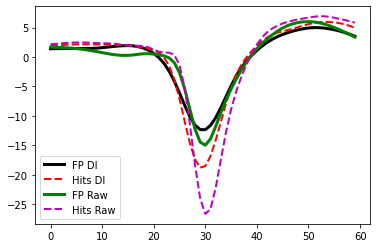

In [ ]:
plt.plot(mean_wf_fp_di[:,max_channel_di], 'k', linewidth=3, label='FP DI')
plt.plot(mean_wf_hits_di[:,max_channel_di],  'r--', linewidth=2, label='Hits DI')
plt.plot(mean_wf_fp_raw[:,max_channel_raw], 'g', linewidth=3,  label='FP Raw')
plt.plot(mean_wf_hits_raw[:,max_channel_raw],  'm--', linewidth=2, label='Hits Raw')
plt.legend()

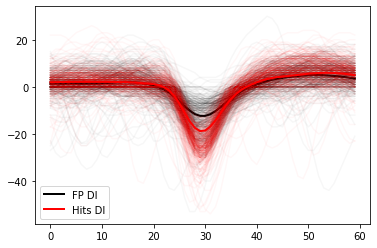

In [ ]:
fig, ax = plt.subplots()
for i in range(300):
    ax.plot(wfs_fp_di[i,:,max_channel_di], 'k', alpha=0.03)
ax.plot(mean_wf_fp_di[:,max_channel_di], 'k', linewidth=2, label='FP DI')

for i in range(300):
    ax.plot(wfs_hits_di[i,:,max_channel_di], 'r', alpha=0.03)
ax.plot(mean_wf_hits_di[:,max_channel_di], 'r', linewidth=2, label='Hits DI')
ax.legend();

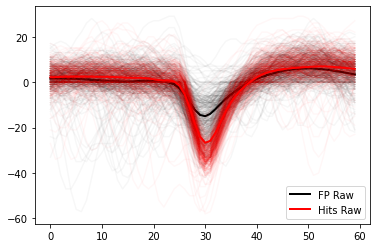

In [ ]:
fig, ax = plt.subplots()
for i in range(300):
    ax.plot(wfs_fp_raw[i,:,max_channel_raw], 'k', alpha=0.03)
ax.plot(mean_wf_fp_raw[:,max_channel_raw], 'k', linewidth=2, label='FP Raw')

for i in range(300):
    ax.plot(wfs_hits_raw[i,:,max_channel_raw], 'r', alpha=0.03)
ax.plot(mean_wf_hits_raw[:,max_channel_raw], 'r', linewidth=2, label='Hits Raw')
ax.legend();

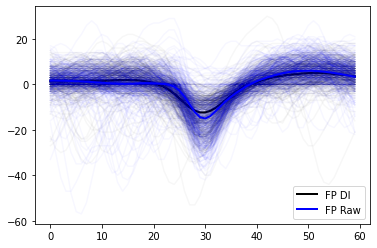

In [ ]:
fig, ax = plt.subplots()
for i in range(300):
    ax.plot(wfs_fp_di[i,:,max_channel_di], 'k', alpha=0.03)
ax.plot(mean_wf_fp_di[:,max_channel_di], 'k', linewidth=2, label='FP DI')

for i in range(300):
    ax.plot(wfs_fp_raw[i,:,max_channel_raw], 'b', alpha=0.03)
ax.plot(mean_wf_fp_raw[:,max_channel_raw], 'b', linewidth=2, label='FP Raw')
ax.legend();

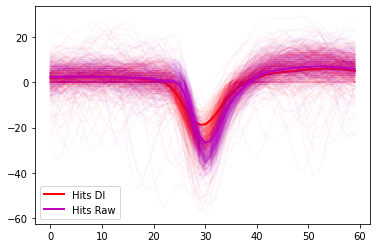

In [ ]:
fig, ax = plt.subplots()
for i in range(300):
    ax.plot(wfs_hits_di[i,:,max_channel_di], 'r', alpha=0.03)
ax.plot(mean_wf_hits_di[:,max_channel_di], 'r', linewidth=2, label='Hits DI')

for i in range(300):
    ax.plot(wfs_hits_raw[i,:,max_channel_raw], 'm', alpha=0.03)
ax.plot(mean_wf_hits_raw[:,max_channel_raw], 'm', linewidth=2, label='Hits Raw')
ax.legend();

#### Appendix: syncing patch and npx indices

In [ ]:
# load stuff
# patch_recording = np.memmap('c14_patch_ch1.bin', dtype=np.float64)
# patch_sync = np.memmap('c14_patch_sync.bin', dtype=np.float64)
# npx_sync = np.memmap('c14_npx_sync.bin', dtype=np.int16)

In [ ]:
# find spike times by finding peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(-patch_recording, prominence =400, distance=50)

In [ ]:
# save 
# np.save('c14_patch_ch1_spike_times_full_patch_ind.npy', peaks)

In [ ]:
# get the timing of the begining of the rectangular sync pulse for patch and npx 
x = patch_sync > 0.5
patch_sync_up = np.nonzero(np.diff(x*1)==1)[0]
npx_sync_up = np.nonzero(np.diff(npx_sync)==1)[0]

In [ ]:
# fit a line; this gives you a way of relating one to the other
p = np.polyfit(patch_sync_up, npx_sync_up, deg=1)

formula: 0.5997133366956805x + -0.04004350972020947


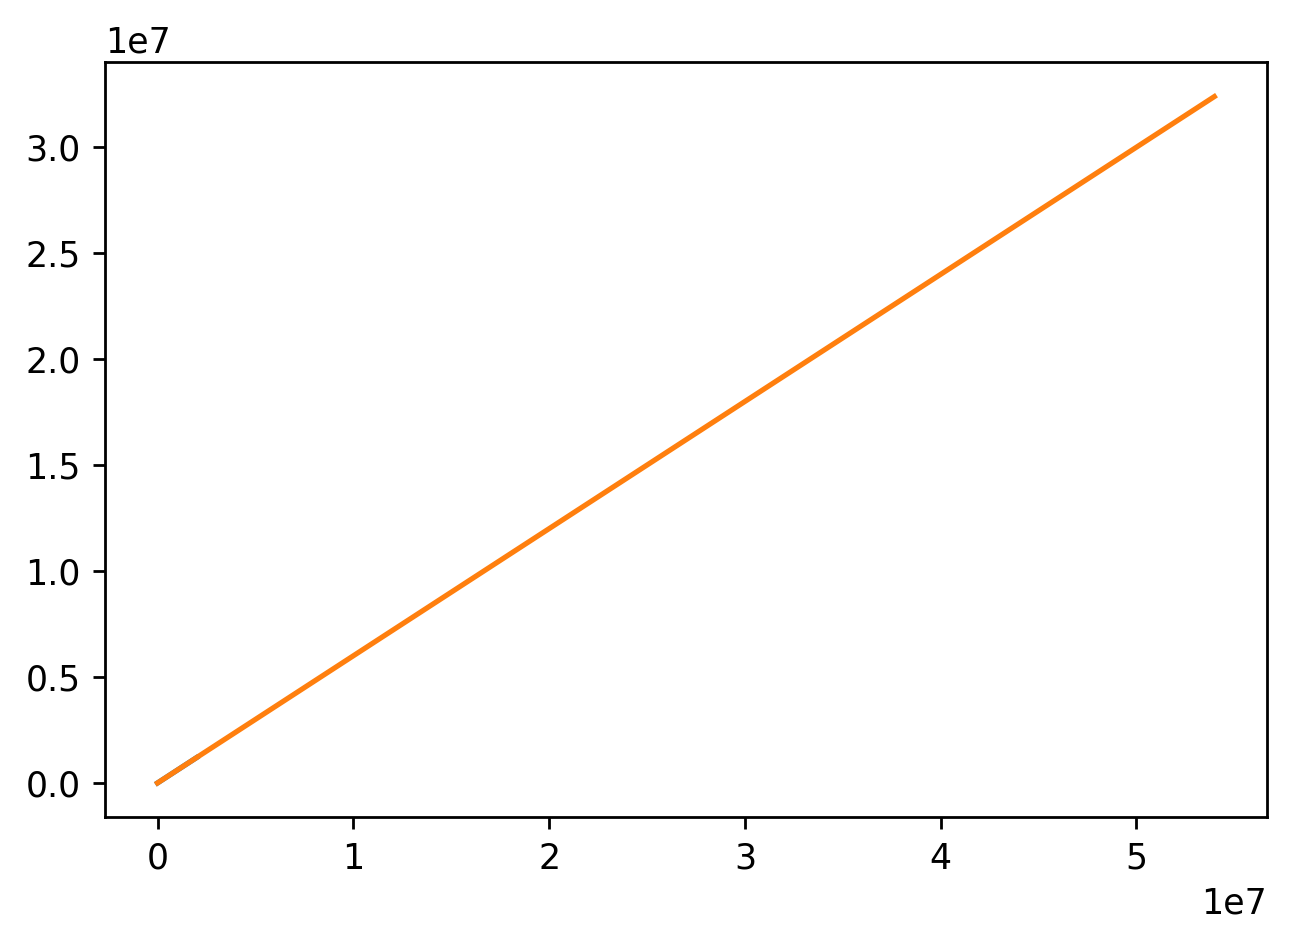

In [ ]:
# check fit
n = np.linspace(0,2000000)
plt.plot(n, n*p[0]+p[1])
plt.plot(patch_sync_up[:2000000], npx_sync_up[:2000000])
print(f'formula: {p[0]}x + {p[1]}')

In [ ]:
# hardcode function
def patch_to_npx_ind(patch_ind):
    x = 0.5997133366956805*patch_ind - 0.04004350972020947
    return x.astype(int)

In [ ]:
# convert to npx ind and save
# x = patch_to_npx_ind(peaks)
# np.save('c14_patch_ch1_spike_times_full_npx_ind.npy', x)